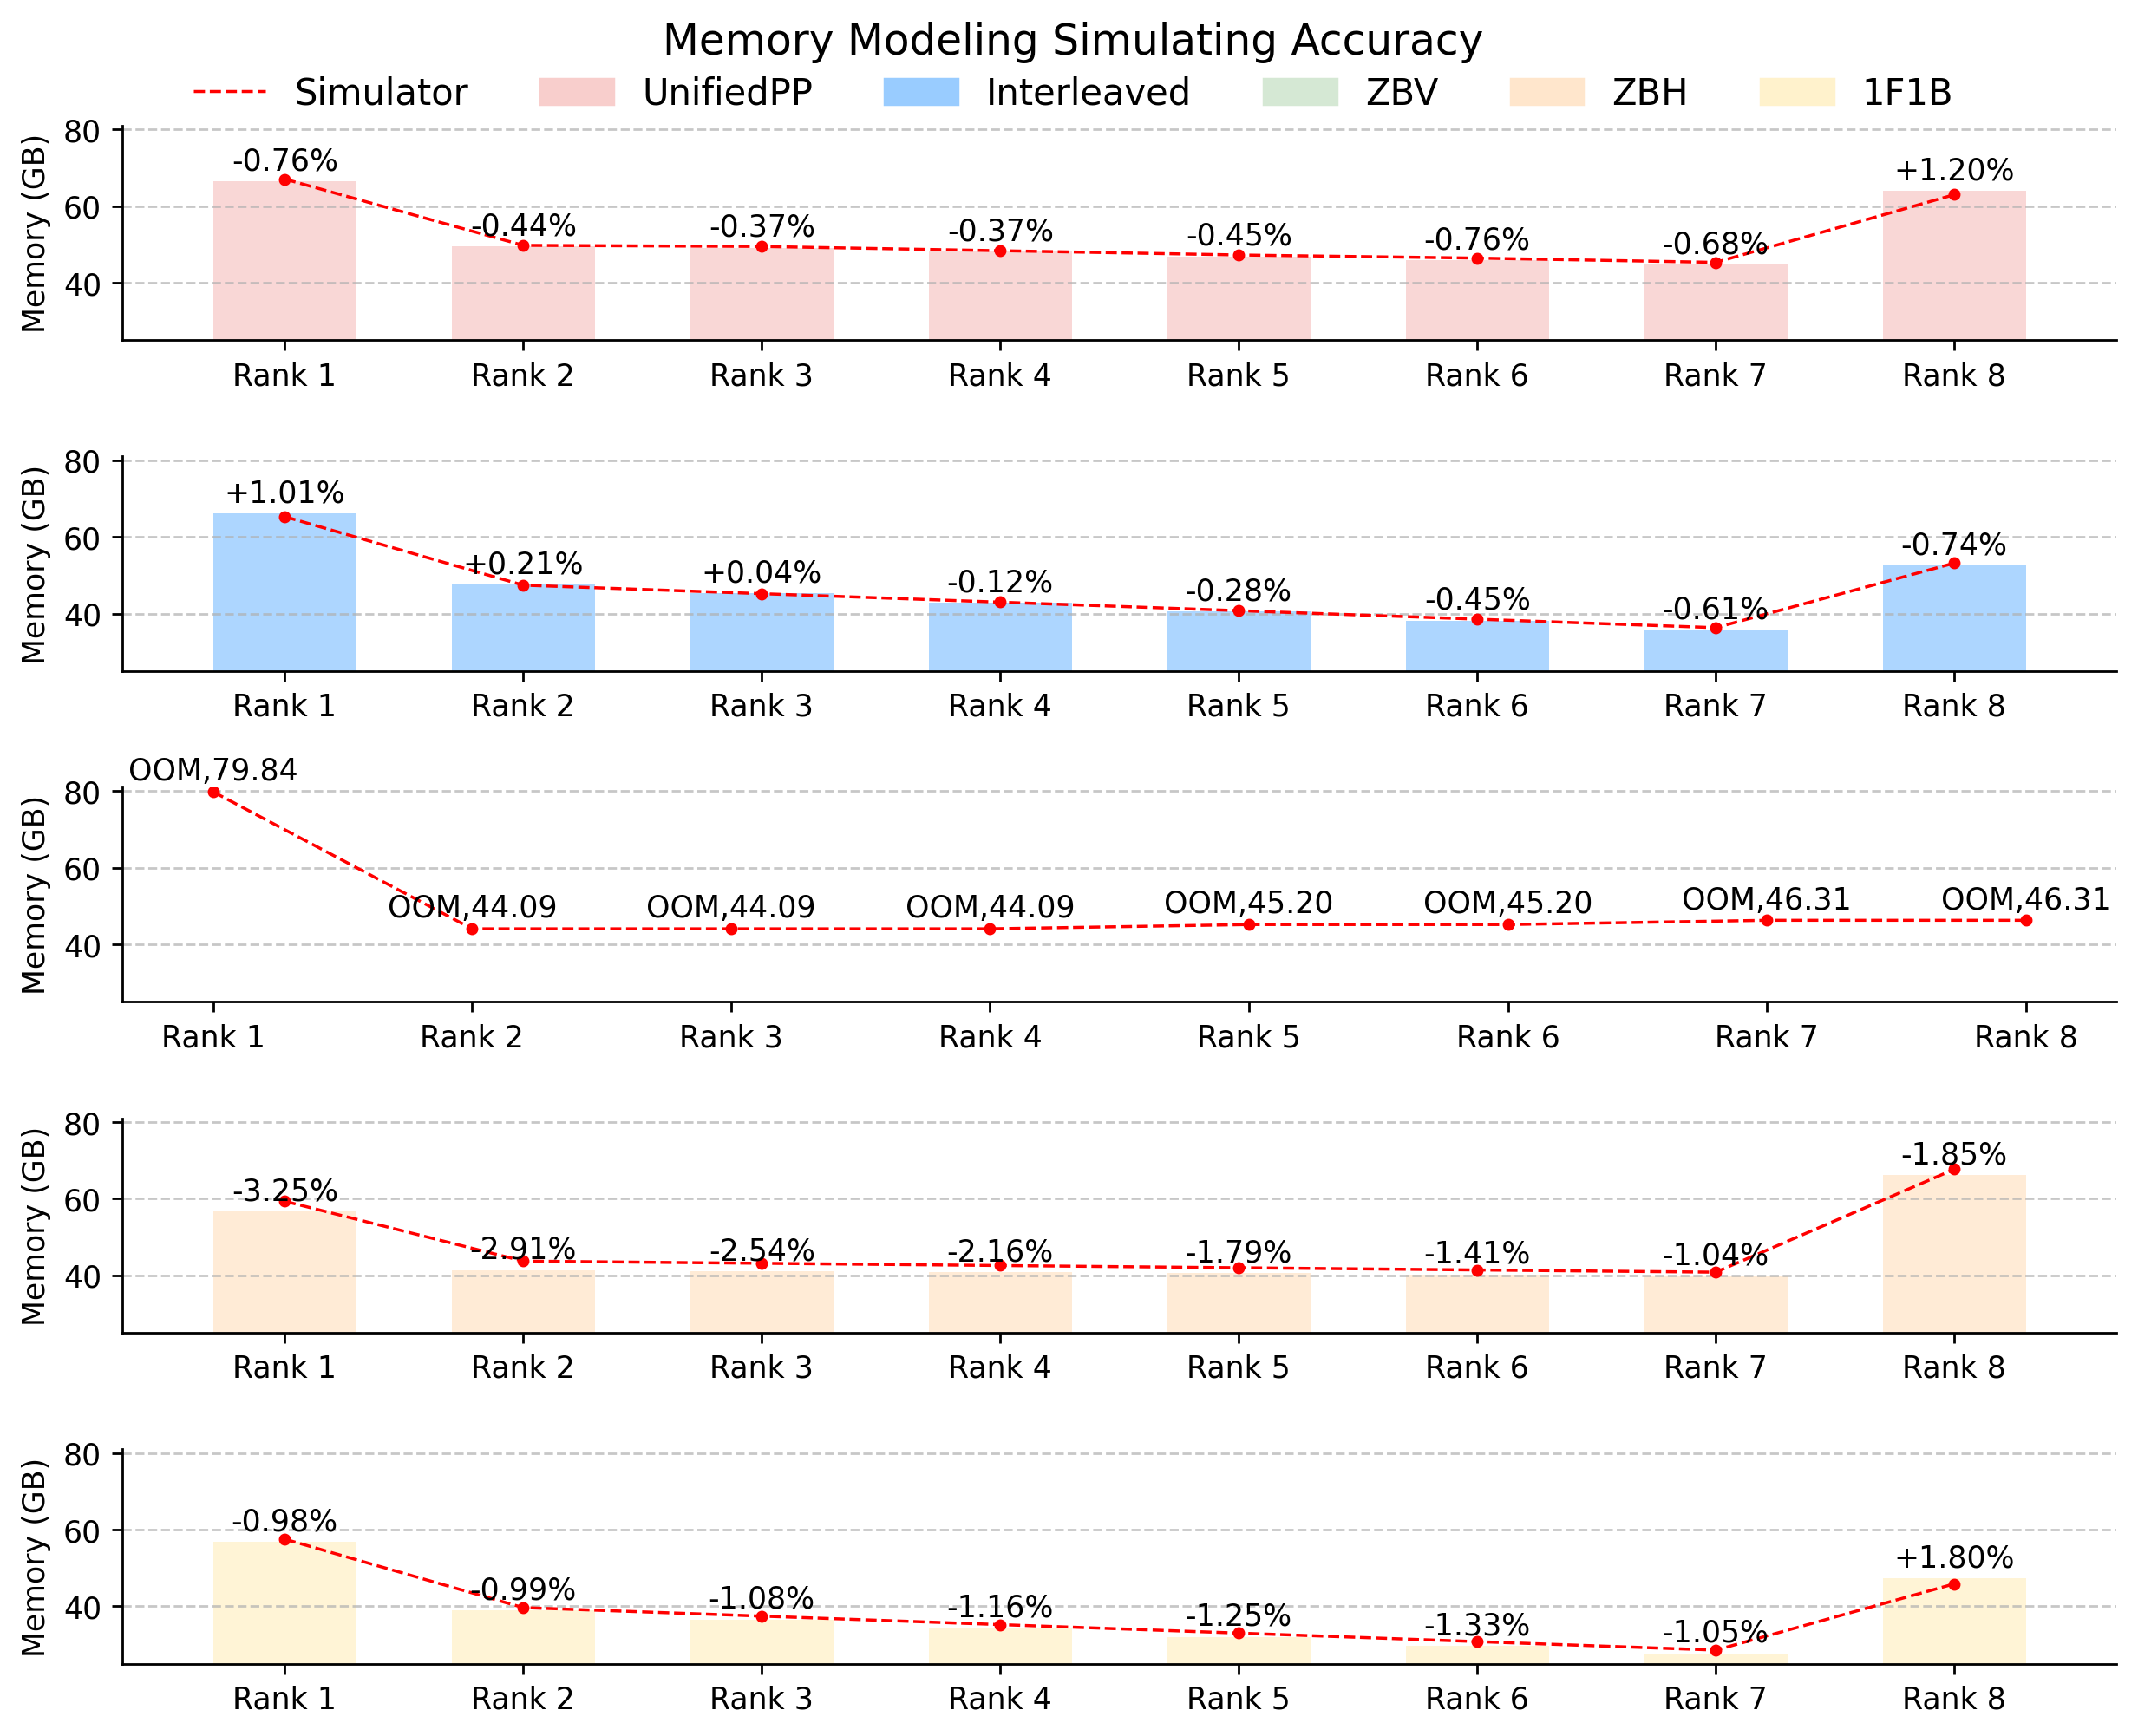

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from e2e_data import *
# 数据预处理
methods = ["UnifiedPP", "Interleaved-L", "Interleaved", "ZBV", "ZBH", "1F1B"]
methods = ["UnifiedPP", "Interleaved", "ZBV", "ZBH", "1F1B"]
x = np.arange(8)
width = 0.6

# 处理OOM数据
def process_data(data):
    return [float(v) if v != "OOM" else np.nan for v in data]

def sinplot():

    # 创建子图
    fig, axs = plt.subplots(6-1, 1, figsize=(10, 8), dpi=250)
    plt.subplots_adjust(
        top=1,      # 顶部边距
        bottom=0,   # 底部边距
    )
    labels = []
    for idx, method in enumerate(methods):
        ax = axs[idx]
        # 提取数据
        pro_data = mem_pro_h800["14B Llama"]["pp8 tp1 dp1 mb32"]["homo"][method]
        sim_data = mem_sim_h800["14B Llama"]["pp8 tp1 dp1 mb32"]["homo"][method]
        labels.append(method)
        # 转换数据格式
        pro_values = process_data(pro_data)
        sim_values = process_data(sim_data)
        # 颜色配置
        bar_color = colors[method]
        line_color = 'red'

        # 绘制柱状图（Profile）
        bars = ax.bar(x, pro_values, width, color=bar_color, alpha=0.8, label='Profile')
        
        # 绘制折线图（Simulator）
        line, = ax.plot(x, sim_values, color=line_color, marker='o', markersize=3, 
                        linewidth=1, linestyle='--', label='Simulator')
        
        # 添加数据标签
        text_offset = 3
        for i, v in enumerate(pro_values):
            if not np.isnan(v):
                diff = (v - sim_data[i])/80*100
                if diff > 0:
                    ax.text(i, v+text_offset, f'+{diff:.2f}%', ha='center', fontsize=10)
                else:
                    ax.text(i, v+text_offset, f'{diff:.2f}%', ha='center', fontsize=10)
            else:
                ax.text(i, sim_data[i]+text_offset, f'OOM,{sim_data[i]:.2f}', ha='center', fontsize=10)

        # 装饰子图
        # ax.set_title(f'{method}', fontsize=12, pad=10)
        ax.set_ylabel('Memory (GB)', fontsize=10)
        ax.set_xticks(x)
        ax.set_xticklabels([f'Rank {i+1}' for i in range(8)], rotation=0)
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        # ax.legend(loc='upper right')
        
        # 统一y轴范围
        all_values = [v for v in pro_values + sim_values if not np.isnan(v)]
        ax.set_ylim(25, 81)
    
    from matplotlib.lines import Line2D  # 导入 Line2D

    # 原始矩形图例
    legend_labels = [plt.Rectangle((0,0),1,1, color=colors[method]) for method in labels]
    # 创建红色折线图例句柄（自定义线型/颜色/宽度）
    red_line = Line2D([0], [0], color='red', lw=1, linestyle='--')  # 实线样式
    legend_labels = [red_line] + legend_labels
    # 合并标签（原始标签 + 新标签）
    all_labels =  ["Simulator"] + labels # 替换成你的实际名称
    
    fig.legend(
        legend_labels,
        all_labels,  # 使用合并后的标签
        loc="upper center",
        bbox_to_anchor=(0.5, 0.98250),
        ncol=len(all_labels),
        frameon=False,
        fontsize=12
    )

    plt.suptitle('Memory Modeling Simulating Accuracy', y=0.995, fontsize=14)
    plt.tight_layout()
sinplot()
sns.despine()
plt.savefig("/Users/hanayukino/sim_pro_mem.pdf", format='pdf', dpi=200, bbox_inches="tight")
plt.show()